![](https://storage.googleapis.com/kaggle-competitions/kaggle/30894/logos/header.png)
# G-Research Crypto - Cross-correlation Time Shift
En traitement du signal, la corrélation croisée est une mesure de similarité de deux séries en fonction du déplacement de l'une par rapport à l'autre ([wiki](https://en.wikipedia.org/wiki/Cross-correlation)).

# Libraries et Fonctions

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import signal

In [116]:
def centered_slice(N, size=0.1):
    """Return a part of a list centered on the middle, using a size in percent or as a number.
    """
    center = int(N/2)
    if size < 1:
        size = int(size * N)
    else:    
        size = int(size)
        
    return slice(center - size, center + size+1)

def log_return(series, periods=1):
    """Function to compute the log return."""
    return np.log(series).diff(periods=periods)

In [5]:
data_folder = "../input/g-research-crypto-forecasting/"
data_folder = ""

# Chargement

In [47]:
df = pd.read_csv(data_folder + 'train_cleaned.csv', index_col=0)
df_asset_details = pd.read_csv(data_folder + 'asset_details.csv').sort_values("Asset_ID")
IDs = sorted(df['Asset_ID'].unique())
Names = df_asset_details.Asset_Name.values

In [166]:
idi, last = 1, 200  # 1 pour Bitcoin et 200 dernières minutes
sub = df[df["Asset_ID"]==1].iloc[-last:] 
fig = go.Figure(data=[go.Candlestick(
    x=sub.index, 
    open=sub['Open'], 
    high=sub['High'], 
    low=sub['Low'], 
    close=sub['Close'])])
fig.show()

# Sur les fermetures

## Exemple

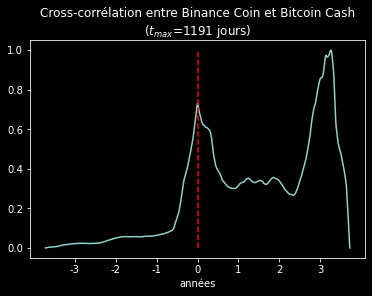

In [147]:
i,j = 0,2
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xticks([i*60*24*365 for i in range(-3,4)], range(-3,4))
plt.xlabel('années')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60/24:.0f} jours)")
plt.show()

On voit pour cette exemple que les deux crypto-monnaies sont plus fortement corrélées avec un décalage de trois ans.
Ceci correspond au *bull-run* précédent.
On considère cela comme une abbération et nous ferons l'hypothèse par la suite que les crypto-monnaies ne peuvent être corrélée au delà de **30 jours**.

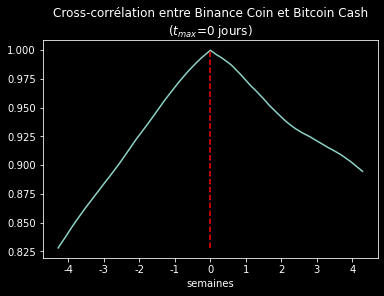

In [ ]:
i,j = 0,2
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=60*24*30)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [corr.min(),1], 'r--')
plt.xticks([i*60*24*7 for i in range(-4,5)], np.arange(-4,5))
plt.xlabel('semaines')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60/24:.0f} jours)")
plt.show()

## Généralisation

In [ ]:
tmaxs = np.zeros((len(IDs), len(IDs)))
corrs = np.ones((len(IDs), len(IDs)))
for i in IDs:
    for j in IDs:
        if i != j:
            ci = df.loc[df['Asset_ID'] == i, 'Close']
            cj = df.loc[df['Asset_ID'] == j, 'Close']
            corr = signal.correlate(ci, cj)
            sli = centered_slice(corr, size=60*24*30)
            lags = signal.correlation_lags(len(ci), len(cj))[sli]
            corrs[i, j] = corr[sli].max()
            tmaxs[i, j] = lags[corr[sli].argmax()]

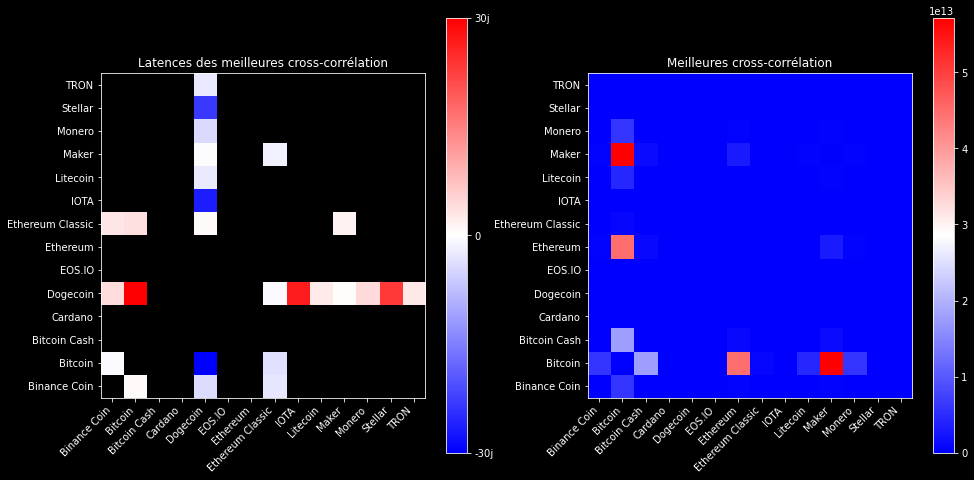

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(np.where(tmaxs == 0, np.nan, tmaxs)[::-1], cmap='bwr')
plt.xticks(range(len(Names)), Names, rotation=45, ha='right')
plt.yticks(range(len(Names)), Names[::-1])
cbar = plt.colorbar(ticks=[-tmaxs.max(), 0, tmaxs.max()])
cbar.ax.set_yticklabels((f'-{tmaxs.max()/60/24:.0f}j', 0, f'{tmaxs.max()/60/24:.0f}j'))
plt.title("Latences des meilleures cross-corrélation")

plt.subplot(122)
plt.imshow(np.where(corrs == 0, np.nan, corrs)[::-1], cmap='bwr')
plt.xticks(range(len(Names)), Names, rotation=45, ha='right')
plt.yticks(range(len(Names)), Names[::-1])
plt.colorbar()
# cbar = plt.colorbar(ticks=[-tmaxs.max(), 0, tmaxs.max()])
# cbar.ax.set_yticklabels((f'-{tmaxs.max()/60/24:.0f}j', 0, f'{tmaxs.max()/60/24:.0f}j'))
plt.title("Meilleures cross-corrélation")
plt.show()

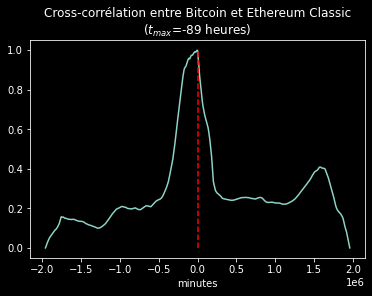

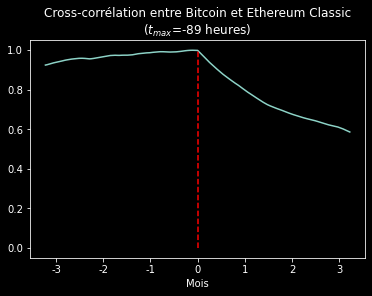

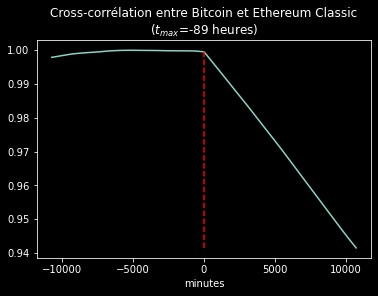

In [ ]:
i,j = 1,7
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xlabel('minutes')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=60*24*100)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xticks([i*60*24*31 for i in range(-3,4)], np.arange(-3,4))
plt.xlabel('Mois')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

last_max = abs(lags[corr.argmax()])
corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=2*last_max)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [corr.min(), 1], 'r--')
plt.xlabel('minutes')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

# Sur Log Return

## Exemple

On voit pour cette exemple que les deux crypto-monnaies sont plus fortement corrélées avec un décalage de trois ans.
Ceci correspond au *bull-run* précédent.
On considère cela comme une abbération et nous ferons l'hypothèse par la suite que les crypto-monnaies ne peuvent être corrélée au delà de **30 jours**.

In [152]:
def compute_shift(x, y):
    """shift of shift means that y starts shift time steps before x"""
    assert len(x) == len(y)
    c = signal.correlate(x, y, method='fft', mode='same')[sli]
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return np.argmax(c)

In [155]:
compute_shift(ci, cj)

43200

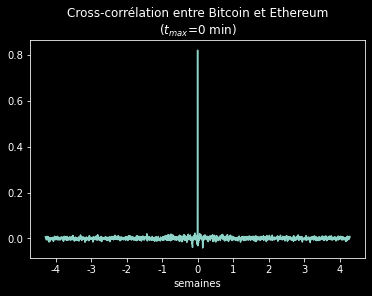

In [162]:
i,j = 1,6
ci = log_return(df.loc[df['Asset_ID'] == i, 'Close'], periods=60).dropna()
cj = log_return(df.loc[df['Asset_ID'] == j, 'Close'], periods=60).dropna()
n = len(ci)
sli = centered_slice(n, size=60*24*30)
lags = signal.correlation_lags(n, n, mode='same')[sli]

# corr = signal.correlate(ci, cj)
corr = signal.correlate(cj, ci, mode='same') / np.sqrt(signal.correlate(ci, ci, mode='same')[int(n/2)] * signal.correlate(cj, cj, mode='same')[int(n/2)])
corr = corr[sli]
# corr /= corr.max()

plt.plot(lags, corr)
# plt.plot([0,0], [corr.min(), corr.max()], 'r--')
plt.xticks([i*60*24*7 for i in range(-4,5)], np.arange(-4,5))
plt.xlabel('semaines')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]:.0f} min)")
plt.show()

## Généralisation

In [103]:
tmaxs = np.zeros((len(IDs), len(IDs)))
corrs = np.ones((len(IDs), len(IDs)))
for i in IDs:
    for j in IDs:
        if i != j:
            ci = log_return(df.loc[df['Asset_ID'] == i, 'Close'], periods=60).dropna()
            cj = log_return(df.loc[df['Asset_ID'] == j, 'Close'], periods=60).dropna()
            corr = signal.correlate(ci, cj)
            sli = centered_slice(corr, size=60*24*30)
            lags = signal.correlation_lags(len(ci), len(cj))[sli]
            corrs[i, j] = corr[sli].max()
            tmaxs[i, j] = lags[corr[sli].argmax()]

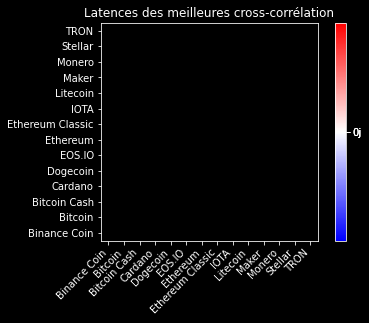

In [104]:
plt.imshow(np.where(tmaxs == 0, np.nan, tmaxs)[::-1], cmap='bwr')
plt.xticks(range(len(Names)), Names, rotation=45, ha='right')
plt.yticks(range(len(Names)), Names[::-1])
cbar = plt.colorbar(ticks=[-tmaxs.max(), 0, tmaxs.max()])
cbar.ax.set_yticklabels((f'-{tmaxs.max()/60/24:.0f}j', 0, f'{tmaxs.max()/60/24:.0f}j'))
plt.title("Latences des meilleures cross-corrélation")
plt.show()

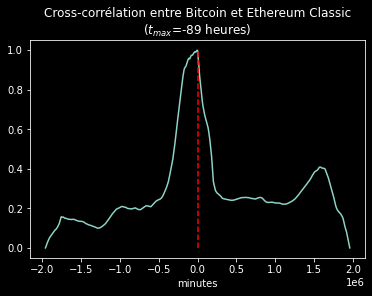

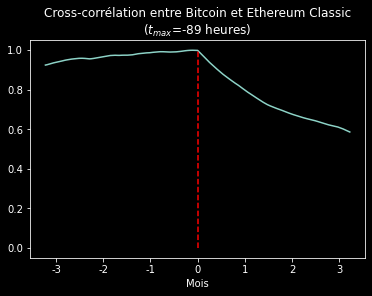

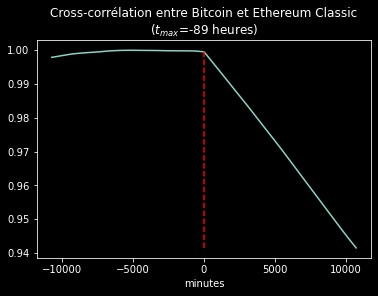

In [ ]:
i,j = 1,7
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xlabel('minutes')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=60*24*100)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xticks([i*60*24*31 for i in range(-3,4)], np.arange(-3,4))
plt.xlabel('Mois')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

last_max = abs(lags[corr.argmax()])
corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=2*last_max)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [corr.min(), 1], 'r--')
plt.xlabel('minutes')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

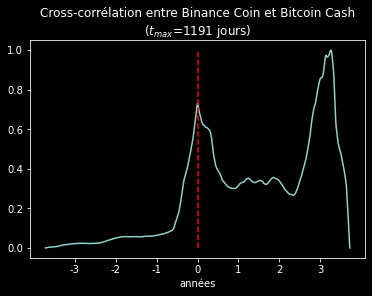

In [ ]:
i,j = 0,2
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xticks([i*60*24*365 for i in range(-3,4)], range(-3,4))
plt.xlabel('années')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60/24:.0f} jours)")
plt.show()

On voit pour cette exemple que les deux crypto-monnaies sont plus fortement corrélées avec un décalage de trois ans.
Ceci correspond au *bull-run* précédent.
On considère cela comme une abbération et nous ferons l'hypothèse par la suite que les crypto-monnaies ne peuvent être corrélée au delà de **30 jours**.

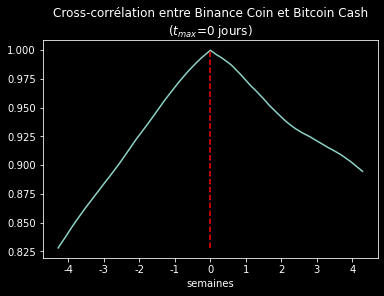

In [ ]:
i,j = 0,2
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=60*24*30)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [corr.min(),1], 'r--')
plt.xticks([i*60*24*7 for i in range(-4,5)], np.arange(-4,5))
plt.xlabel('semaines')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60/24:.0f} jours)")
plt.show()

## Généralisation

In [ ]:
tmaxs = np.zeros((len(IDs), len(IDs)))
corrs = np.ones((len(IDs), len(IDs)))
for i in IDs:
    for j in IDs:
        if i != j:
            ci = df.loc[df['Asset_ID'] == i, 'Close']
            cj = df.loc[df['Asset_ID'] == j, 'Close']
            corr = signal.correlate(ci, cj)
            sli = centered_slice(corr, size=60*24*30)
            lags = signal.correlation_lags(len(ci), len(cj))[sli]
            corrs[i, j] = corr[sli].max()
            tmaxs[i, j] = lags[corr[sli].argmax()]

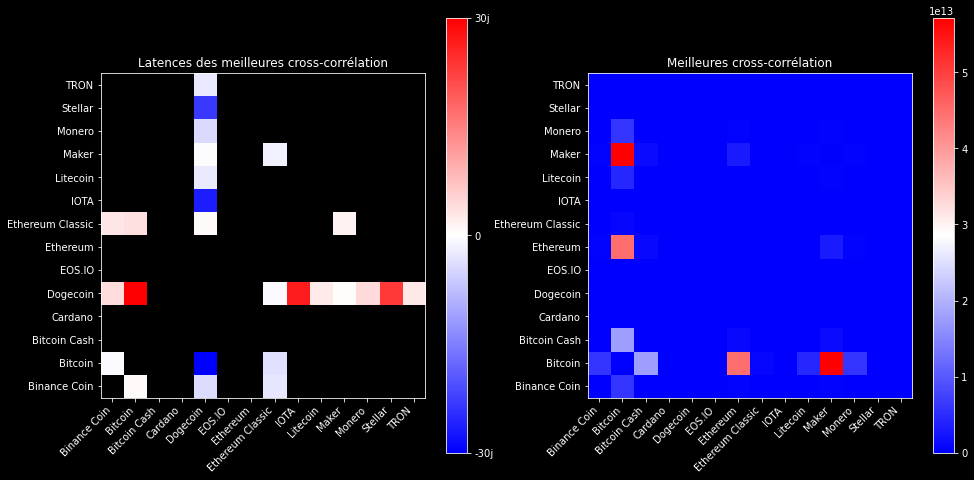

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(np.where(tmaxs == 0, np.nan, tmaxs)[::-1], cmap='bwr')
plt.xticks(range(len(Names)), Names, rotation=45, ha='right')
plt.yticks(range(len(Names)), Names[::-1])
cbar = plt.colorbar(ticks=[-tmaxs.max(), 0, tmaxs.max()])
cbar.ax.set_yticklabels((f'-{tmaxs.max()/60/24:.0f}j', 0, f'{tmaxs.max()/60/24:.0f}j'))
plt.title("Latences des meilleures cross-corrélation")

plt.subplot(122)
plt.imshow(np.where(corrs == 0, np.nan, corrs)[::-1], cmap='bwr')
plt.xticks(range(len(Names)), Names, rotation=45, ha='right')
plt.yticks(range(len(Names)), Names[::-1])
plt.colorbar()
# cbar = plt.colorbar(ticks=[-tmaxs.max(), 0, tmaxs.max()])
# cbar.ax.set_yticklabels((f'-{tmaxs.max()/60/24:.0f}j', 0, f'{tmaxs.max()/60/24:.0f}j'))
plt.title("Meilleures cross-corrélation")
plt.show()

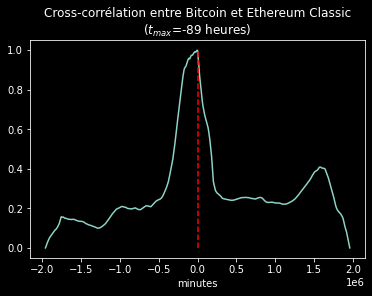

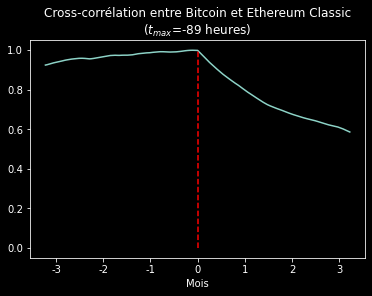

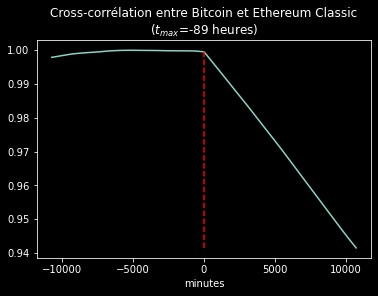

In [ ]:
i,j = 1,7
ci = df.loc[df['Asset_ID'] == i, 'Close']
cj = df.loc[df['Asset_ID'] == j, 'Close']

corr = signal.correlate(ci, cj)
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xlabel('minutes')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=60*24*100)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [0,1], 'r--')
plt.xticks([i*60*24*31 for i in range(-3,4)], np.arange(-3,4))
plt.xlabel('Mois')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()

last_max = abs(lags[corr.argmax()])
corr = signal.correlate(ci, cj)
sli = centered_slice(corr, size=2*last_max)
corr = corr[sli]
corr /= corr.max()
lags = signal.correlation_lags(len(ci), len(cj))[sli]

plt.plot(lags, corr)
plt.plot([0,0], [corr.min(), 1], 'r--')
plt.xlabel('minutes')
plt.title(f"Cross-corrélation entre {Names[i]} et {Names[j]}\n($t_{{max}}$={lags[corr.argmax()]/60:.0f} heures)")
plt.show()